In [1]:
import spotchaos.syntheticSignals as sp

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import time
import tqdm
import pickle
from astropy.timeseries import LombScargle
from scipy.integrate import RK45, DOP853
from scipy.stats import chi2, iqr, poisson
from scipy.signal import argrelextrema
from scipy.spatial.distance import chebyshev
from scipy.optimize import curve_fit, minimize
from scipy.special import factorial
from scipy import stats

In [ ]:
rArr = np.load("./corrDimTesting/rArr.npy")                                       #(50,)

C0_1000_t15_m3 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=15_m=3_C0.npy")   #(50,) 
C0_5000_t15_m3 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=15_m=3_C0.npy")   #(50,)
C0_10000_t15_m3 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=15_m=3_C0.npy") #(50,)
C0_20000_t15_m3 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=15_m=3_C0.npy") #(50,)

C0_1000_t60_m3 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=60_m=3_C0.npy")   # same for all of these
C0_5000_t60_m3 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=60_m=3_C0.npy")
C0_10000_t60_m3 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=60_m=3_C0.npy")
C0_20000_t60_m3 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=60_m=3_C0.npy")

C0_1000_t15_m4 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=15_m=4_C0.npy")
C0_5000_t15_m4 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=15_m=4_C0.npy")
C0_10000_t15_m4 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=15_m=4_C0.npy")
C0_20000_t15_m4 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=15_m=4_C0.npy")

C0_1000_t60_m4 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=60_m=4_C0.npy")
C0_5000_t60_m4 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=60_m=4_C0.npy")
C0_10000_t60_m4 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=60_m=4_C0.npy")
C0_20000_t60_m4 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=60_m=4_C0.npy")

C1_1000_t15_m3 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=15_m=3_C1.npy")
C1_5000_t15_m3 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=15_m=3_C1.npy")
C1_10000_t15_m3 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=15_m=3_C1.npy")
C1_20000_t15_m3 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=15_m=3_C1.npy")

C1_1000_t60_m3 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=60_m=3_C1.npy")
C1_5000_t60_m3 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=60_m=3_C1.npy")
C1_10000_t60_m3 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=60_m=3_C1.npy")
C1_20000_t60_m3 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=60_m=3_C1.npy")

C1_1000_t15_m4 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=15_m=4_C1.npy")
C1_5000_t15_m4 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=15_m=4_C1.npy")
C1_10000_t15_m4 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=15_m=4_C1.npy")
C1_20000_t15_m4 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=15_m=4_C1.npy")

C1_1000_t60_m4 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=60_m=4_C1.npy")
C1_5000_t60_m4 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=60_m=4_C1.npy")
C1_10000_t60_m4 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=60_m=4_C1.npy")
C1_20000_t60_m4 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=60_m=4_C1.npy")

C2_1000_t15_m3 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=15_m=3_C2.npy")
C2_5000_t15_m3 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=15_m=3_C2.npy")
C2_10000_t15_m3 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=15_m=3_C2.npy")
C2_20000_t15_m3 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=15_m=3_C2.npy")

C2_1000_t60_m3 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=60_m=3_C2.npy")
C2_5000_t60_m3 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=60_m=3_C2.npy")
C2_10000_t60_m3 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=60_m=3_C2.npy")
C2_20000_t60_m3 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=60_m=3_C2.npy")

C2_1000_t15_m4 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=15_m=4_C2.npy")
C2_5000_t15_m4 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=15_m=4_C2.npy")
C2_10000_t15_m4 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=15_m=4_C2.npy")
C2_20000_t15_m4 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=15_m=4_C2.npy")

C2_1000_t60_m4 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=60_m=4_C2.npy")
C2_5000_t60_m4 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=60_m=4_C2.npy")
C2_10000_t60_m4 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=60_m=4_C2.npy")
C2_20000_t60_m4 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=60_m=4_C2.npy")

nArr_1000_t15_m3 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=15_m=3_nArr.npy")   #(970, 50) = 1000-(2*15)
nArr_5000_t15_m3 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=15_m=3_nArr.npy")   #(4970, 50) = 5000-(2*15) etc
nArr_10000_t15_m3 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=15_m=3_nArr.npy") #(9970, 50)
nArr_20000_t15_m3 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=15_m=3_nArr.npy") #(19970, 50)

nArr_1000_t60_m3 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=60_m=3_nArr.npy")   #(880, 50) = 1000-(2*60)
nArr_5000_t60_m3 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=60_m=3_nArr.npy")   #(4880, 50)
nArr_10000_t60_m3 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=60_m=3_nArr.npy") #(9880, 50)
nArr_20000_t60_m3 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=60_m=3_nArr.npy") #(19880, 50)

nArr_1000_t15_m4 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=15_m=4_nArr.npy")   #(955, 50) = 1000-(3*15)
nArr_5000_t15_m4 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=15_m=4_nArr.npy")   #(4955, 50)
nArr_10000_t15_m4 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=15_m=4_nArr.npy") #(9955, 50)
nArr_20000_t15_m4 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=15_m=4_nArr.npy") #(19955, 50)

nArr_1000_t60_m4 = np.load("./corrDimTesting/lorenz_x_1000_v0_tau=60_m=4_nArr.npy")   #(820, 50) = 1000-(3*60)
nArr_5000_t60_m4 = np.load("./corrDimTesting/lorenz_x_5000_v0_tau=60_m=4_nArr.npy")   #(4820, 50)
nArr_10000_t60_m4 = np.load("./corrDimTesting/lorenz_x_10000_v0_tau=60_m=4_nArr.npy") #(9820, 50)
nArr_20000_t60_m4 = np.load("./corrDimTesting/lorenz_x_20000_v0_tau=60_m=4_nArr.npy") #(19820, 50)

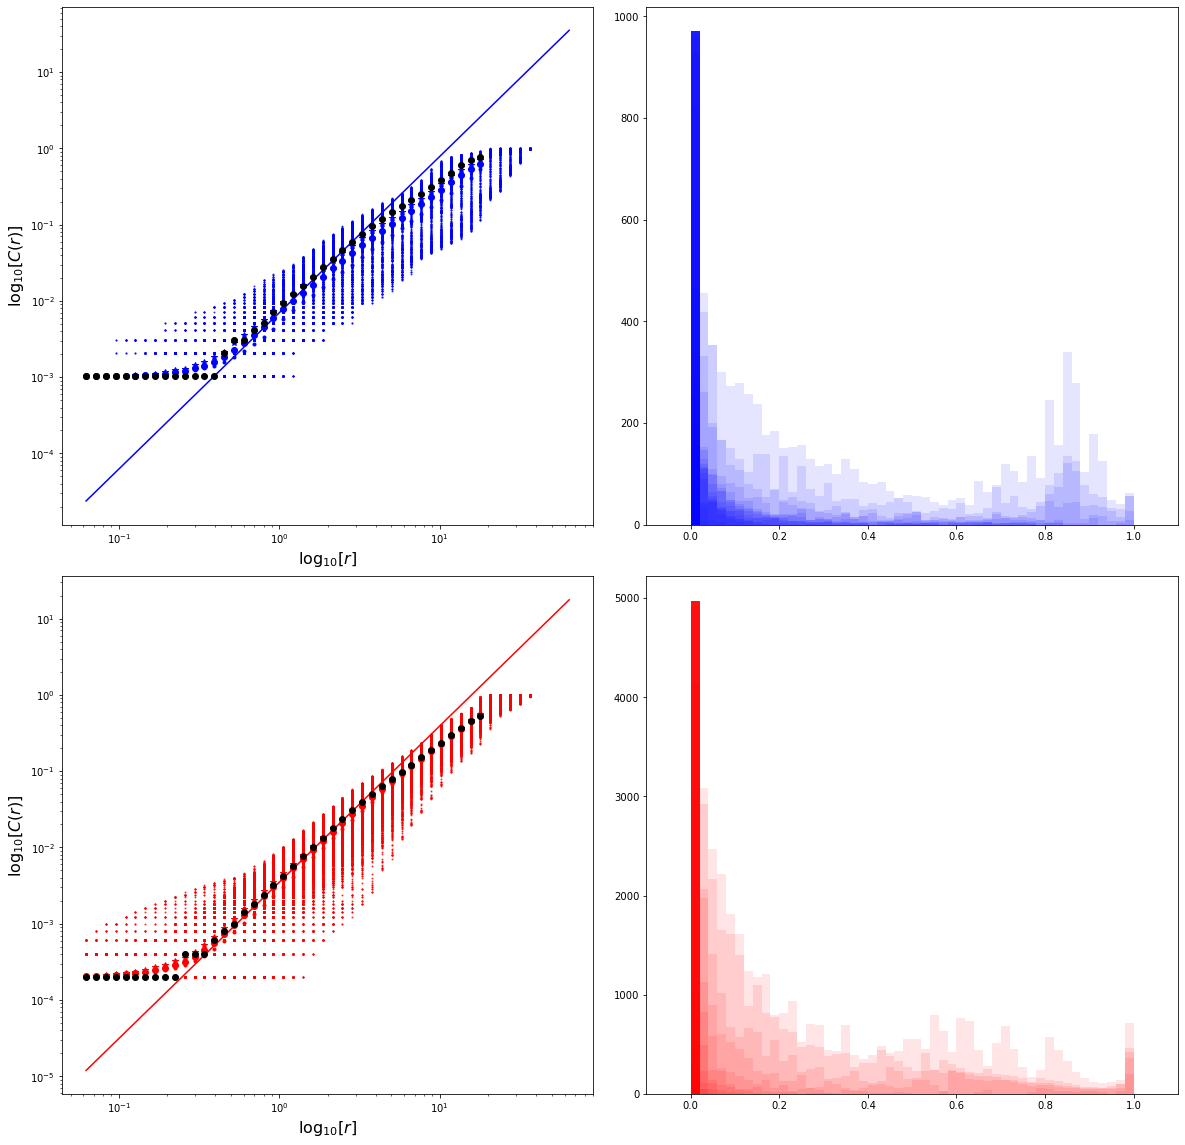

In [76]:
fig, axes = plt.subplots(2,2,figsize=(20,20))

# plot c0, c1, c2 for the length-1000 time series
axes[0,0].plot(rArr,C0_1000_t15_m3,'b.')
axes[0,0].plot(rArr,C1_1000_t15_m3,'bo')
axes[0,0].plot(rArr,C2_1000_t15_m3,'b*')
axes[0,0].plot(rArr,0.007*rArr**2.05, 'b-')

for i in range(0,np.shape(nArr_1000_t15_m3)[1]):
    # plot distribution of number of points that are within a sphere of radius rArr[i] of each point. (distribution of 970 data points at each r)
    # the harmonic (geometric, arithmetic) mean of this distribution is C0 (C1, C2)
    # at small r, each point only has 1 "neighbor": itself. therefore all entries in nArr[:,i] will be 1./(len(timeSeries) - (m-1)*tau)
    # at large r, the number of neighbors will grow to the number of points indexed by pyNNdescent--when this is the case, I have 
    #   set the number of neighbors equal to np.NaN. C0, C1, C2 are likewise NaN if any point in the distribution is NaN.
    # questions: does this distribution look Poisson-like at small r? 
    #            does it become ~Gaussian at sufficiently large r?
    #            What does it look like at large r? 
    axes[0,0].plot(rArr[i]*np.ones_like(nArr_1000_t15_m3[:,i]),nArr_1000_t15_m3[:,i],color='b',marker='.',ls='None',ms=2,alpha=0.7)
    axes[0,0].plot(rArr[i],np.median(nArr_1000_t15_m3[:,i]),'ko')
    # histogram of the distribution
    axes[0,1].hist(nArr_1000_t15_m3[:,i][np.isfinite(nArr_1000_t15_m3[:,i])],bins=50,range=(0.,1.),color='b',alpha=0.1)

# same for the length-5000 time series --- nArr now has 4970 data points at each r
axes[1,0].plot(rArr,C0_5000_t15_m3,'r.')
axes[1,0].plot(rArr,C1_5000_t15_m3,'ro')
axes[1,0].plot(rArr,C2_5000_t15_m3,'r*')
axes[1,0].plot(rArr,0.0035*rArr**2.05, 'r-')
for i in range(0,np.shape(nArr_5000_t15_m3)[1]):
    axes[1,0].plot(rArr[i]*np.ones_like(nArr_5000_t15_m3[:,i]),nArr_5000_t15_m3[:,i],color='r',marker='.',ls='None',ms=2,alpha=0.7)
    axes[1,0].plot(rArr[i],np.median(nArr_5000_t15_m3[:,i]),'ko')
    axes[1,1].hist(nArr_5000_t15_m3[:,i][np.isfinite(nArr_5000_t15_m3[:,i])],bins=50,range=(0.,1.),color='r',alpha=0.1)

for ax in axes[:,0]:
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\log_{10}[r]$", fontsize=16)
    ax.set_ylabel(r"$\log_{10}[C(r)]$", fontsize=16)
for ax in axes[:,1]:
    ax.set_xlim(-0.1,1.1)
plt.subplots_adjust(hspace=0.1,wspace=0.1)
plt.show()

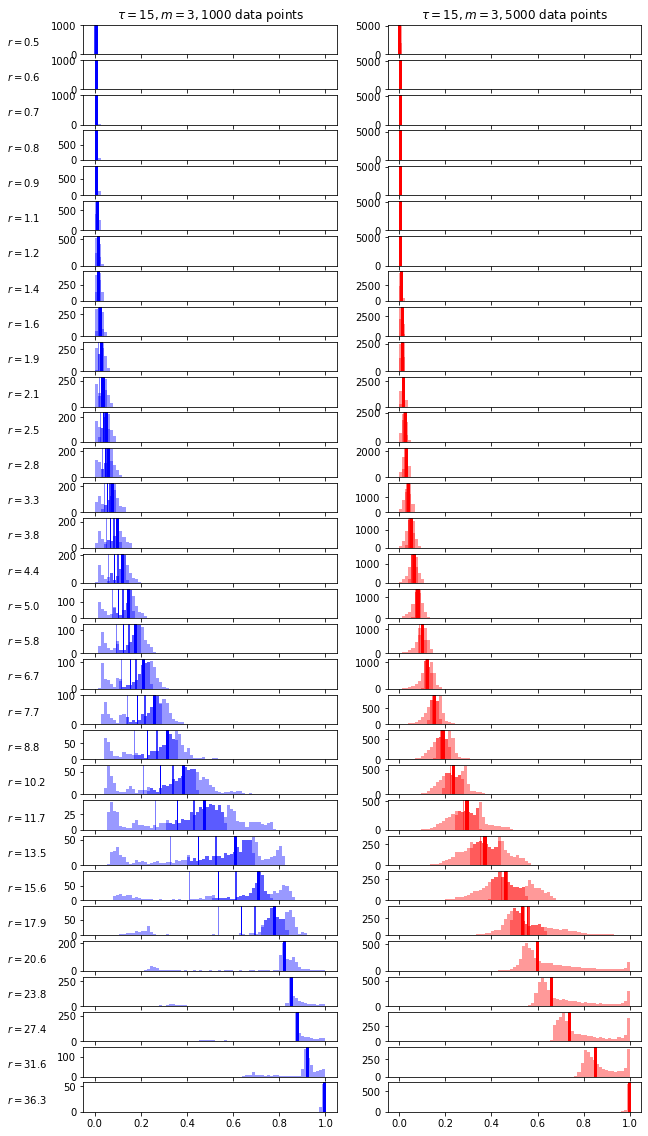

In [74]:
# hard to see what's going on in the overlapping histograms, so look at the distributions at each individual r

# don't bother plotting the choices of r where all entries in the nArr distribution are NaN
nFinite = [len(nArr_1000_t15_m3[:,i][np.isfinite(nArr_1000_t15_m3[:,i])]) for i in range(50)]
nFinite = np.array(nFinite)
stopHere = np.arange(50)[nFinite == 0][0]
skipRows = 15
fig, axes = plt.subplots(stopHere-skipRows,2,figsize=(10,20))

for a in range(0,stopHere-skipRows):
    i = a+skipRows
    
    # whole distribution
    axes[a,0].hist(nArr_1000_t15_m3[:,i][np.isfinite(nArr_1000_t15_m3[:,i])],bins=75,range=(0.,1.),color='b',alpha=0.4)
    # try plotting the interquartile points only
    axes[a,0].hist(nArr_1000_t15_m3[:,i][(nArr_1000_t15_m3[:,i] > np.percentile(nArr_1000_t15_m3[:,i],25)) & (nArr_1000_t15_m3[:,i] < np.percentile(nArr_1000_t15_m3[:,i], 75))],bins=75,range=(0.,1.),color='b',alpha=0.4)
    # vertical lines to mark c0, c1, c2
    axes[a,0].axvline(C0_1000_t15_m3[i], color='b',lw=0.5)
    axes[a,0].axvline(C1_1000_t15_m3[i], color='b',lw=1)
    axes[a,0].axvline(C2_1000_t15_m3[i], color='b',lw=1.5)
    axes[a,0].axvline(np.median(nArr_1000_t15_m3[:,i][np.isfinite(nArr_1000_t15_m3[:,i])]), color='b',lw=3)
    axes[a,0].text(-0.3,0.3,r"$r = {0}$".format(np.around(rArr[i],1)), transform=axes[a,0].transAxes)
    
    # same for length-5000 time series
    axes[a,1].hist(nArr_5000_t15_m3[:,i][np.isfinite(nArr_5000_t15_m3[:,i])],bins=75,range=(0.,1.),color='r',alpha=0.4)
    axes[a,1].hist(nArr_5000_t15_m3[:,i][(nArr_5000_t15_m3[:,i] > np.percentile(nArr_5000_t15_m3[:,i],25)) & (nArr_5000_t15_m3[:,i] < np.percentile(nArr_5000_t15_m3[:,i], 75))],bins=75,range=(0.,1.),color='r',alpha=0.4)
    axes[a,1].axvline(C0_5000_t15_m3[i], color='r',lw=0.5)
    axes[a,1].axvline(C1_5000_t15_m3[i], color='r',lw=1)
    axes[a,1].axvline(C2_5000_t15_m3[i], color='r',lw=1.5)
    axes[a,1].axvline(np.median(nArr_5000_t15_m3[:,i][np.isfinite(nArr_5000_t15_m3[:,i])]), color='r',lw=3)
    
axes[0,0].set_title(r"$\tau = 15, m = 3, 1000$ data points")
axes[0,1].set_title(r"$\tau = 15, m = 3, 5000$ data points")
#plt.show()
plt.savefig("./corrDimTesting/nNeighborsHistograms.png")

In [107]:
# try fitting poissons to the length-5000 histograms

def poisson(k, lamb):
    """poisson pdf, parameter lamb is the fit parameter"""
    return (lamb**k/factorial(k)) * np.exp(-lamb)


def negative_log_likelihood(params, data):
    """
    The negative log-Likelihood-Function
    """

    lnl = - np.sum(np.log(poisson(data, params[0])))
    return lnl

/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Us

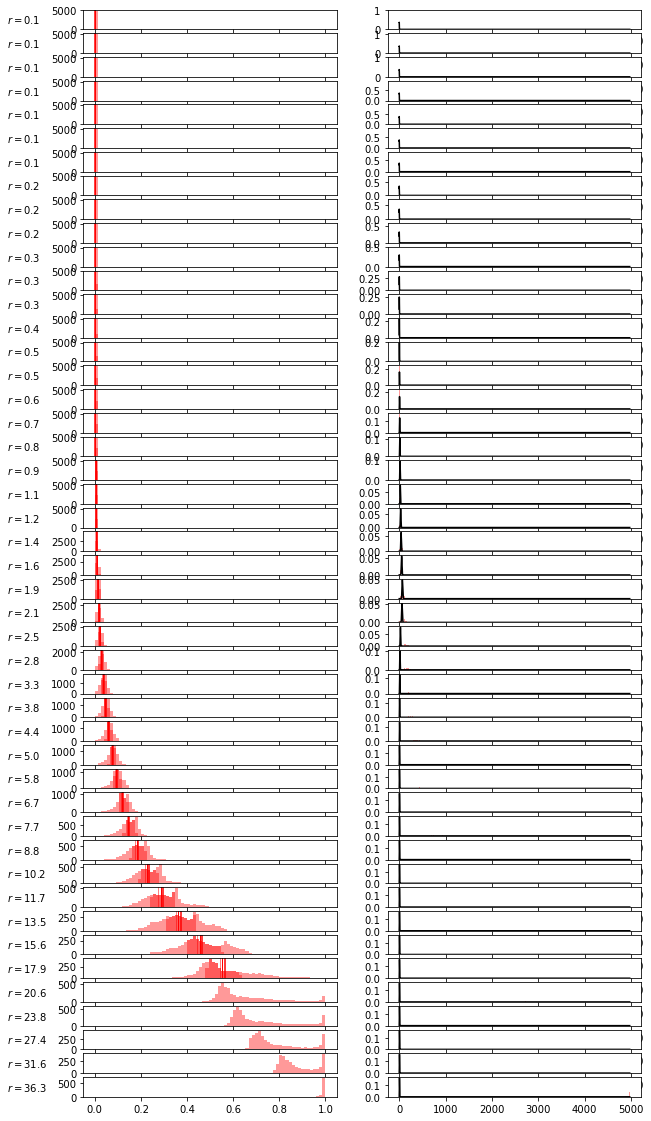

In [153]:
fig, axes = plt.subplots(stopHere,2,figsize=(10,20))

for i in range(0,stopHere):

    # fit a poisson to the data by minimizing the negative log-Likelihood
    data = nArr_5000_t15_m3[:,i][np.isfinite(nArr_5000_t15_m3[:,i])] * 4970. 
    #print(data)
    
    result = minimize(negative_log_likelihood,  # function to minimize
                  x0=np.ones(1),            # start value
                  args=(data,),             # additional arguments for function
                  method='Powell',          # minimization method, see docs
                  options={'maxiter':10000},
                  )
    # result is a scipy optimize result object, the fit parameters 
    # are stored in result.x
    #print(result.x)
    
    axes[i,0].hist(nArr_5000_t15_m3[:,i][np.isfinite(nArr_5000_t15_m3[:,i])],bins=75,range=(0.,1.),color='r',alpha=0.4)
    axes[i,0].hist(nArr_5000_t15_m3[:,i][(nArr_5000_t15_m3[:,i] > np.percentile(nArr_5000_t15_m3[:,i],25)) & (nArr_5000_t15_m3[:,i] < np.percentile(nArr_5000_t15_m3[:,i], 75))],bins=75,range=(0.,1.),color='r',alpha=0.4)
    axes[i,0].axvline(C0_5000_t15_m3[i], color='r',lw=0.5)
    axes[i,0].axvline(C1_5000_t15_m3[i], color='r',lw=1)
    axes[i,0].axvline(C2_5000_t15_m3[i], color='r',lw=1.5)
    axes[i,0].text(-0.3,0.3,r"$r = {0}$".format(np.around(rArr[i],1)), transform=axes[i,0].transAxes)
    
    # plot best-fit poisson
    #print(result.x[0])
    n,bins,patches = axes[i,1].hist(data,bins=4970,range=(0,4970),color='r',alpha=0.4,density=True)
    bins = bins[0:-1]
    #print(bins)
    #annoyingly the below can *only* operate on integer inputs, so bins have to be at integer locations
    #print(stats.poisson.pmf(bins, result.x[0]))
    axes[i,1].plot(midbins, stats.poisson.pmf(bins, result.x[0]), 'k-')

plt.show()


